Guided Project
---
Predicting Bike Rentals

**Primary variable of interest:** 
number of bike rentals in a day (cnt)

**Columns:**
* instant = unique_id
* dteday = date
* season = season
* yr = year
* mnth = month
* hr = hour
* holidy = whether or not it was a holiday
* weekday = whether or not it was a weekday
* workingday = whether or not it was a working day
* weathersit = the weather situation (categorical)
* temp = temperature on 0-1 scale
* atemp = adjusted temperature
* hum = humidity on 0-1 scale
* windspeed = windspeed on 0-1 scale
* casual = number of casual (not registered) rentals
* registered = number of registered rentals
* cnt = total number of rentals

**Part 1:** Introduction and Setup

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  




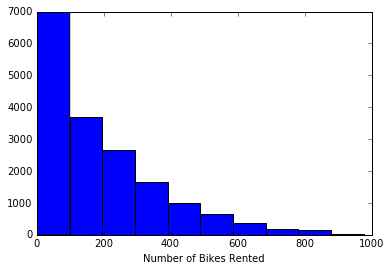



Correlations Between Variables and Number of Bikes Rented
instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64


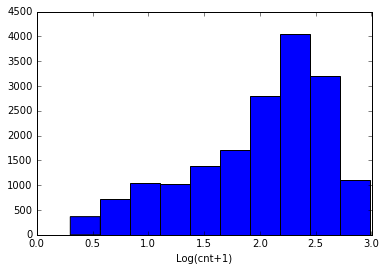



Correlations Between Variables and Log(cnt)
instant       0.204266
season        0.167198
yr            0.168902
mnth          0.114360
hr            0.564470
holiday      -0.026007
weekday       0.029496
workingday    0.004339
weathersit   -0.121874
temp          0.388694
atemp         0.385523
hum          -0.340790
windspeed     0.115275
casual        0.585639
registered    0.792535
cnt           0.820513
log_cnt       1.000000
Name: log_cnt, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

bike_rentals = pd.read_csv("bike_rental_hour.csv")
print(bike_rentals.head())
print('\n')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(bike_rentals['cnt'])
ax.set_xlabel('Number of Bikes Rented')
plt.show()

corrs = bike_rentals.corr(method='pearson')
print('\n')
print('Correlations Between Variables and Number of Bikes Rented')
print(corrs['cnt'])

log_cnt = bike_rentals['cnt'].apply(lambda x: math.log(x+1,10))
bike_rentals['log_cnt'] = log_cnt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(log_cnt)
ax.set_xlabel("Log(cnt+1)")
plt.show()

corrs = bike_rentals.corr(method='pearson')
print('\n')
print('Correlations Between Variables and Log(cnt)')
print(corrs['log_cnt'])

**Discussion:** The histogram of bike rentals shows that the distribution is not normally distributed. Based on simple univariate relationships, a number of variables appear to correlate with total number of bikes rented. However, many of the variables are related to each other, and two of the variables (the ones with the strongest correlations, casual and registered) are related to the total countThe strongest correlations are with casual and registered rentals, but those are not independent variable. Thus, we need distill these features down a bit.

**Part 2:** Calculating Features

In [2]:
def assign_label(hr):
    if (hr >=6) & (hr < 12):
        return 1
    elif (hr >= 12) & (hr < 18):
        return 2
    elif (hr >= 18) & (hr < 24):
        return 3
    elif (hr >= 0) & (hr < 6):
        return 4
    
time_label = bike_rentals['hr'].apply(assign_label)
bike_rentals['time_label'] = time_label
bike_rentals['reg_frac'] = bike_rentals['registered'] / (bike_rentals['cnt'])

print(bike_rentals[['hr','time_label','registered','cnt','reg_frac']].head())

new_comp = ['hr','time_label','cnt']
corrs = bike_rentals[new_comp].corr(method='pearson')
print('\n')
print('Compring time_label and hr Correlations')
print(corrs['cnt'])

reduced = ['time_label','cnt','log_cnt','reg_frac']
corrs = bike_rentals[reduced].corr(method='pearson')
print('\n')
print('Correlations Between Variables and Number of Bikes Rented')
print(corrs['cnt'])

reduced = ['time_label','cnt','log_cnt','reg_frac']
corrs = bike_rentals[reduced].corr(method='pearson')
print('\n')
print('Correlations Between Variables and Log(ct)')
print(corrs['log_cnt'])

   hr  time_label  registered  cnt  reg_frac
0   0           4          13   16  0.812500
1   1           4          32   40  0.800000
2   2           4          27   32  0.843750
3   3           4          10   13  0.769231
4   4           4           1    1  1.000000


Compring time_label and hr Correlations
hr            0.394071
time_label   -0.378318
cnt           1.000000
Name: cnt, dtype: float64


Correlations Between Variables and Number of Bikes Rented
time_label   -0.378318
cnt           1.000000
log_cnt       0.820513
reg_frac     -0.123607
Name: cnt, dtype: float64


Correlations Between Variables and Log(ct)
time_label   -0.556958
cnt           0.820513
log_cnt       1.000000
reg_frac     -0.138264
Name: log_cnt, dtype: float64


In [3]:
hours = [x for x in range(0,24)]
tod = [1,2,3,4]

avg_hr = []
plus_std_hr = []
minus_std_hr = []
for hr in hours:
    in_hr = bike_rentals.loc[bike_rentals['hr'] == hr]
    avg = in_hr['cnt'].mean()
    std = in_hr['cnt'].std()
    avg_hr.append(avg)
    plus_std_hr.append(avg+std)
    minus_std_hr.append(avg-std)

avg_tod = []
plus_std_tod = []
minus_std_tod = []
for t in tod:
    in_tod = bike_rentals.loc[bike_rentals['time_label'] == t]
    avg = in_tod['cnt'].mean()
    std = in_tod['cnt'].std()
    avg_tod.append(avg)
    plus_std_tod.append(avg+std)
    minus_std_tod.append(avg-std)

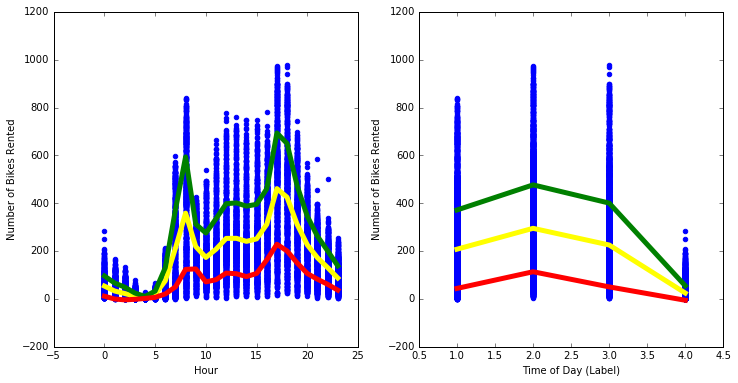

In [4]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(bike_rentals['hr'],bike_rentals['cnt'],color="blue")
ax1.plot(hours,avg_hr,color="yellow",lw=5.0)
ax1.plot(hours,plus_std_hr,color="green",lw=5.0)
ax1.plot(hours,minus_std_hr,color="red",lw=5.0)
ax1.set_xlabel("Hour")
ax1.set_ylabel("Number of Bikes Rented")

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(bike_rentals['time_label'],bike_rentals['cnt'],color="blue")
ax2.plot(tod,avg_tod,color="yellow",lw=5.0)
ax2.plot(tod,plus_std_tod,color="green",lw=5.0)
ax2.plot(tod,minus_std_tod,color="red",lw=5.0)
ax2.set_xlabel("Time of Day (Label)")
ax2.set_ylabel("Number of Bikes Rented")
plt.show()

**Discussion:** The project guidelines suggested binning hours into portions of the day. You can see from the plots of the counts by time label vs counts by hour that the time label approximation actually misses some important features of the data. Each plot has three lines shown, with the middle line representing the average number of rentals in that period, the top line representing the average plus one standard deviation, and the bottom line representing the average minuse one standard deviation. The time label data does not actually preserved the spikes in rental numbers around 8-9 AM and 5-7 PM. For the purposes of this exercise, I will stick with the suggested transformation, however.

**Part 3:** Train / Test Split

In [5]:
train = bike_rentals.sample(frac=0.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

**Discussion:** The error metric that I'll choose for this exercise is the root mean squared error because I want to make sure that extreme deviations are penalized more harshly than minor deviations.

**Part 4:** Applying Linear Regression

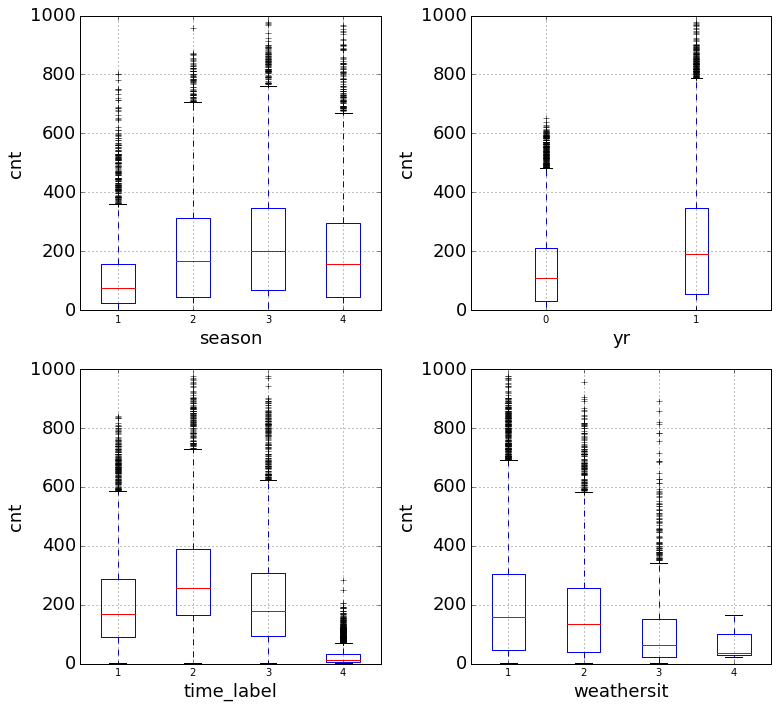

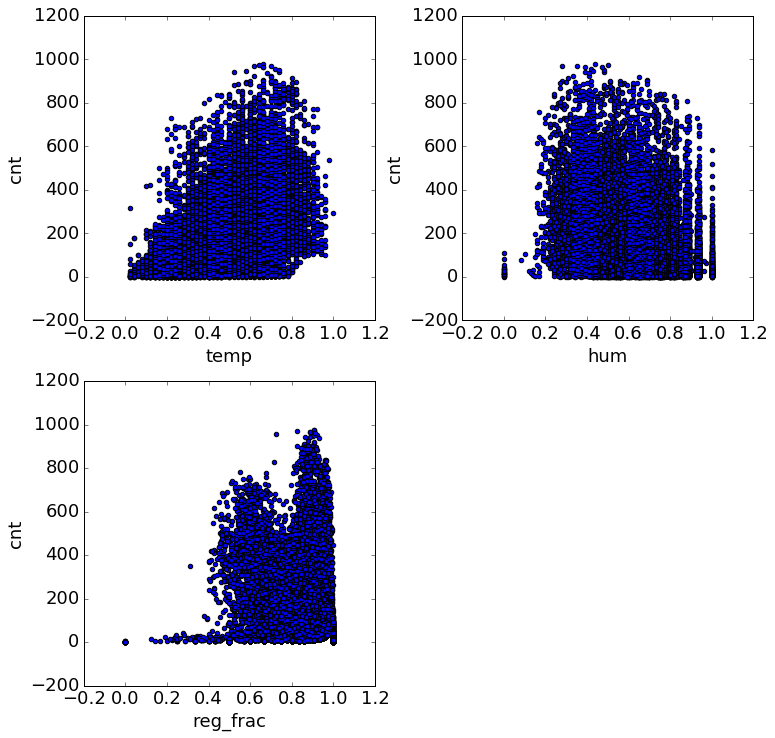

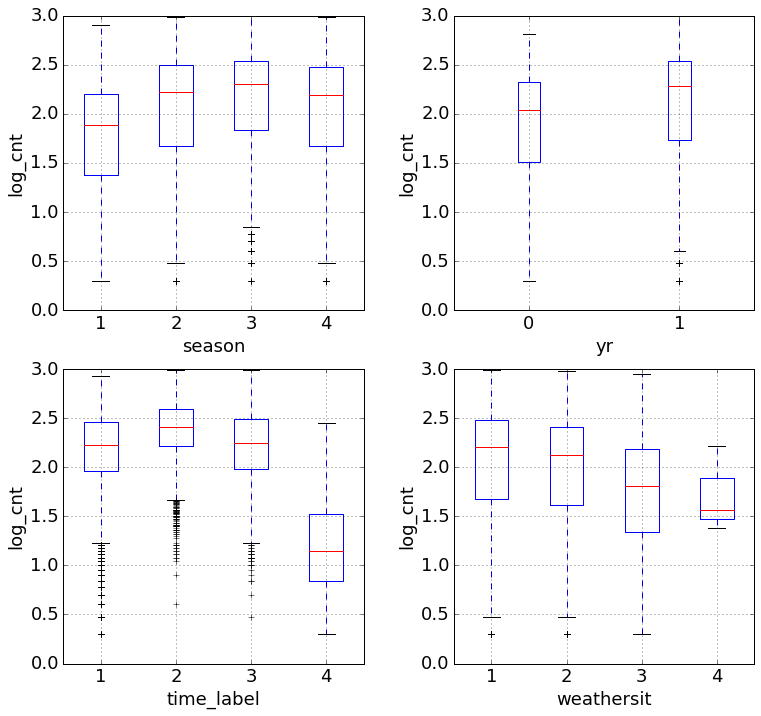

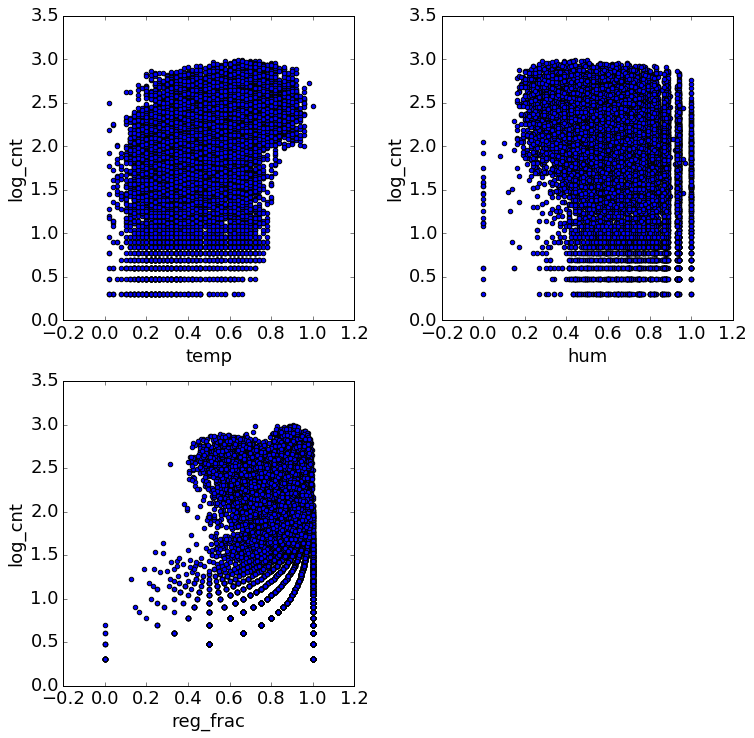

In [6]:
box_plt = ['season','yr','time_label','weathersit']
scatter_plt = ['temp','hum','reg_frac']

def build_plots(df,cols,y,type):
    fig = plt.figure(figsize=(12,12))
    for i,col in enumerate(cols):
        n = math.ceil(len(cols)/2)
        ax = fig.add_subplot(n,2,i+1)
        if type == "box":
            df.boxplot(ax=ax,column=y,by=col)
        else:
            ax.scatter(df[col],df[y])
        ax.set_xlabel(col)
        ax.set_ylabel(y)
        ax.set_title("")

    font = {'size':18}
    plt.rc('font',**font)
    fig.subplots_adjust(wspace=0.3)
    fig.suptitle("")
    plt.show()

build_plots(bike_rentals,box_plt,'cnt','box')
build_plots(bike_rentals,scatter_plt,'cnt','scatter')
build_plots(bike_rentals,box_plt,'log_cnt','box')
build_plots(bike_rentals,scatter_plt,'log_cnt','scatter')

**Notes for Variable Selection:** The relationships plotted above clearly indicate that the categorical variables are not necessarily good for linear relationships. The fraction of rentals from registered customers also appears to be a poor fit for modelling in general.

Thus, for all modelling purposes going forward, the columns of interest will be:

cols = ['season','yr','time_label','weathersit','temp','hum']

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

cols = ['season','yr','time_label','weathersit','temp','hum']
model = LinearRegression()
model.fit(train[cols],train['cnt'])
pred_lin = model.predict(test[cols])
mse_lin = mean_squared_error(test['cnt'],pred_lin)
rmse_lin = mse_lin**(1/2)
print('RMSE for cnt: {0}'.format(rmse_lin))

model = LinearRegression()
model.fit(train[cols],train['log_cnt'])
pred_log = model.predict(test[cols])
pred_lin2 = 10**pred_log
mse_log = mean_squared_error(test['cnt'],pred_lin2)
rmse_log = mse_log**(1/2)
print('RMSE for log(cnt): {0}'.format(rmse_log))

RMSE for cnt: 140.94091779684715
RMSE for log(cnt): 172.54133334140607


**Discussion:** The root mean squared error using a linear value for count is slightly lower than using a logarithmic value for the count, so even though the log transform appeared to improve the distribution, it did not significantly impact the linear regression.

**Part 5:** Applying Decision Trees

In [8]:
from sklearn.tree import DecisionTreeRegressor

def rmse_decision_tree(y, max_depth, min_samples_leaf):
    model = DecisionTreeRegressor(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
    model.fit(train[cols],train[y])
    predictions = model.predict(test[cols])
    if y == 'log_cnt':
        predictions = 10**predictions
    mse = mean_squared_error(test['cnt'],predictions)
    return mse**(1/2)

depth = [2,4,6,8,10]
samples = [2,10,100,1000,5000]

print('Decision Tree Errors for Counts')
for d in depth:
    for s in samples:
        print('max_depth = {0}, min_samples_leaf = {1}, RMSE = {2}'.\
              format(d,s,rmse_decision_tree('cnt',d,s)))

print('\n')
print('Decision Tree Errors for log(cnt)')
for d in depth:
    for s in samples:
        print('max_depth = {0}, min_samples_leaf = {1}, RMSE = {2}'.\
              format(d,s,rmse_decision_tree('log_cnt',d,s)))

Decision Tree Errors for Counts
max_depth = 2, min_samples_leaf = 2, RMSE = 146.35395639653578
max_depth = 2, min_samples_leaf = 10, RMSE = 146.35395639653578
max_depth = 2, min_samples_leaf = 100, RMSE = 146.35395639653578
max_depth = 2, min_samples_leaf = 1000, RMSE = 146.35395639653578
max_depth = 2, min_samples_leaf = 5000, RMSE = 172.1119209532534
max_depth = 4, min_samples_leaf = 2, RMSE = 130.34905354283413
max_depth = 4, min_samples_leaf = 10, RMSE = 130.34905354283413
max_depth = 4, min_samples_leaf = 100, RMSE = 130.34905354283413
max_depth = 4, min_samples_leaf = 1000, RMSE = 131.6004023470927
max_depth = 4, min_samples_leaf = 5000, RMSE = 172.1119209532534
max_depth = 6, min_samples_leaf = 2, RMSE = 124.5629634692837
max_depth = 6, min_samples_leaf = 10, RMSE = 124.56473575934041
max_depth = 6, min_samples_leaf = 100, RMSE = 125.11845793767753
max_depth = 6, min_samples_leaf = 1000, RMSE = 131.6004023470927
max_depth = 6, min_samples_leaf = 5000, RMSE = 172.1119209532534
ma

**Discussion:** The decision tree approach seems to do a better job of predicting the values, and once again the linear counts appear to be better behaved than the log(cnt) scale.

**Part 6:** Applying Random Forests

In [9]:
from sklearn.ensemble import RandomForestRegressor

def rmse_random_forest(y, max_depth, min_samples_leaf):
    model = RandomForestRegressor(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
    model.fit(train[cols],train[y])
    predictions = model.predict(test[cols])
    if y == 'log_cnt':
        predictions = 10**predictions
    mse = mean_squared_error(test['cnt'],predictions)
    return mse**(1/2)

depth = [2,4,6,8,10]
samples = [2,10,100,1000,5000]

print('Random Forest Errors for Counts')
for d in depth:
    for s in samples:
        print('max_depth = {0}, min_samples_leaf = {1}, RMSE = {2}'.\
              format(d,s,rmse_random_forest('cnt',d,s)))

print('\n')
print('Random Forest Errors for log(cnt)')
for d in depth:
    for s in samples:
        print('max_depth = {0}, min_samples_leaf = {1}, RMSE = {2}'.\
              format(d,s,rmse_random_forest('log_cnt',d,s)))

Random Forest Errors for Counts
max_depth = 2, min_samples_leaf = 2, RMSE = 145.9847193641783
max_depth = 2, min_samples_leaf = 10, RMSE = 145.8694855068292
max_depth = 2, min_samples_leaf = 100, RMSE = 145.4470756042521
max_depth = 2, min_samples_leaf = 1000, RMSE = 145.36504058361982
max_depth = 2, min_samples_leaf = 5000, RMSE = 184.39405014394976
max_depth = 4, min_samples_leaf = 2, RMSE = 129.35305181970023
max_depth = 4, min_samples_leaf = 10, RMSE = 129.0143208390428
max_depth = 4, min_samples_leaf = 100, RMSE = 129.33085976093162
max_depth = 4, min_samples_leaf = 1000, RMSE = 136.58387710087848
max_depth = 4, min_samples_leaf = 5000, RMSE = 184.39431551875828
max_depth = 6, min_samples_leaf = 2, RMSE = 123.24052130444518
max_depth = 6, min_samples_leaf = 10, RMSE = 123.27445366117895
max_depth = 6, min_samples_leaf = 100, RMSE = 124.15274541486252
max_depth = 6, min_samples_leaf = 1000, RMSE = 135.477432252281
max_depth = 6, min_samples_leaf = 5000, RMSE = 184.3903547595389
max

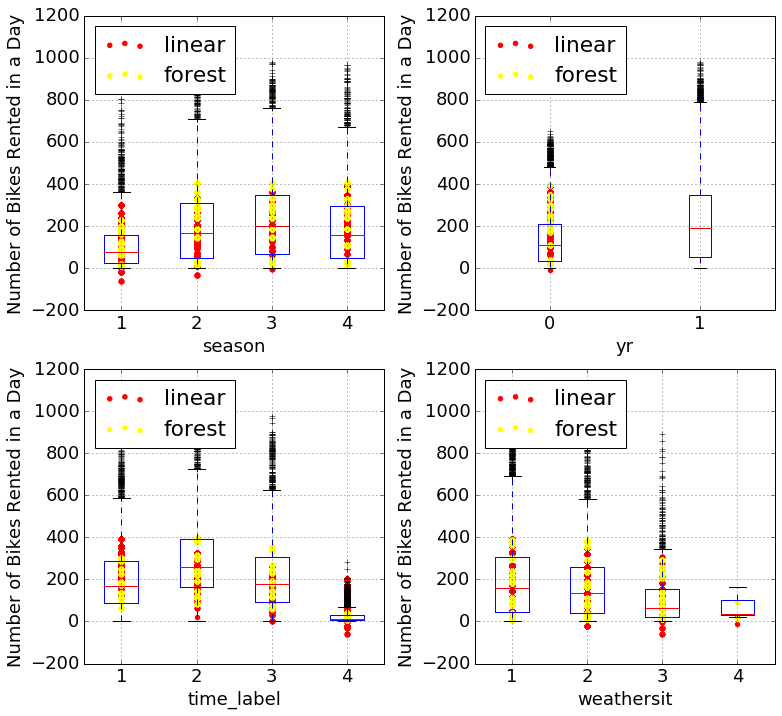

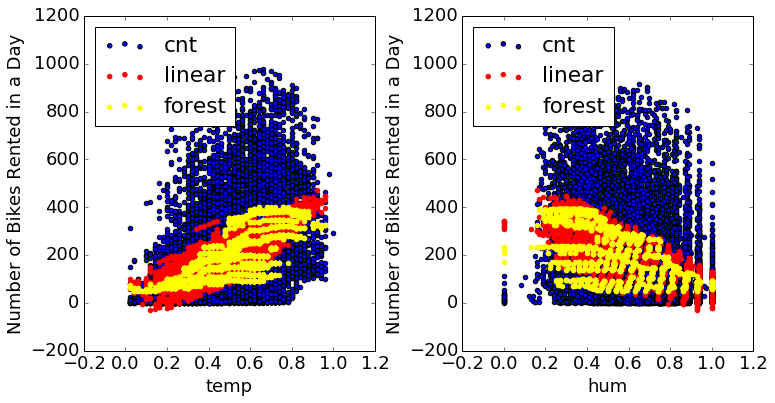

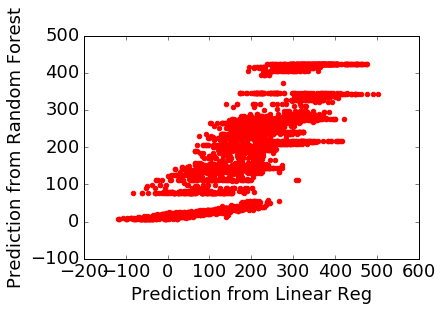

In [10]:
box_plt = ['season','yr','time_label','weathersit']
scatter_plt = ['temp','hum']

def build_plots_reg(cols,type):
    n = math.ceil(len(cols)/2)
    fig = plt.figure(figsize=(12,6*n))
    for i,col in enumerate(cols):
        ax = fig.add_subplot(n,2,i+1)
        if type == "box":
            data = bike_rentals.boxplot(ax=ax,column='cnt',by=col)
        else:
            data = ax.scatter(bike_rentals[col],bike_rentals['cnt'])
        lr = LinearRegression()
        lr.fit(train[cols],train['cnt'])
        pred_lr = lr.predict(test[cols])
        rf = RandomForestRegressor(max_depth=5,min_samples_leaf=50)
        rf.fit(train[cols],train['cnt'])
        pred_rf = rf.predict(test[cols])
        linear = ax.scatter(test[col],pred_lr,color="red",label='linear')
        forest = ax.scatter(test[col],pred_rf,color="yellow",label='forest')
        ax.set_xlabel(col)
        ax.set_ylabel('Number of Bikes Rented in a Day')
        ax.legend(loc='upper left')
        ax.set_title("")

    font = {'size':18}
    plt.rc('font',**font)
    fig.subplots_adjust(wspace=0.3)
    fig.suptitle("")
    plt.show()

build_plots_reg(box_plt,'box')
build_plots_reg(scatter_plt,'scatter')


lr = LinearRegression()
lr.fit(train[cols],train['cnt'])
pred_lr = lr.predict(test[cols])
rf = RandomForestRegressor(max_depth=5,min_samples_leaf=50)
rf.fit(train[cols],train['cnt'])
pred_rf = rf.predict(test[cols])
    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(pred_lr,pred_rf,color="red")
ax.set_xlabel('Prediction from Linear Reg')
ax.set_ylabel('Prediction from Random Forest')
plt.show()

**Discussion:** Using random forests does reduce the errors relative to using a single decision tree classifier. There doesn't seem to be any significant drift in the models over the range of predictions (e.g., the range of predicted values for both models is similar). One notable difference is that random forests don't predict negative values, whereas linear regression does. That means that if linear regression were to be used, the predictions would first need to be cleaned up.

**Part 7:** Next Steps

Some suggestions for additional work:
* Try to create additional hybrid features based on the existing set
* Try predicting casual and registered counts rather than total

For now, I'm going to park this.